In [1]:
import pandas as pd
import glob
import os
from tqdm import tqdm
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:/Users/ch14b/Desktop/Machine Learning/Project/bert.csv")
test=pd.read_csv(r"C:\Users\ch14b\Desktop\Machine Learning\Project\2021-01\bertwave2.csv")
df=pd.concat([df,test],axis=0)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow=CountVectorizer(max_features=800)
bow.fit(df['full_text'])
X =bow.transform(df['full_text'])
data_bow = pd.DataFrame(X.toarray(),columns=bow.get_feature_names())
data_bow.head()

,00,000,000000,10,100,11,12,13,14,15,...,years,yes,yesterday,yet,york,you,young,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data_bow['sentiment']=df['sentiment_score'].to_numpy()
data_bow

,00,000,000000,10,100,11,12,13,14,15,...,yes,yesterday,yet,york,you,young,your,yourself,zero,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
660695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
660697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_bow, test_size = 0.2)

In [21]:
trainX=train.loc[:,train.columns!='sentiment']
trainY=train['sentiment']
testX=test.loc[:,test.columns!='sentiment']
testY=test['sentiment']

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=1)
classifier.fit(trainX,trainY)
y_pred=classifier.predict(testX)

In [23]:
from sklearn import metrics
print("Accuracy = ",metrics.accuracy_score(testY,y_pred))
print("Classification Report")
print(metrics.classification_report(testY,y_pred))

Accuracy =  0.6414635992129559
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.68      0.66     52823
           1       0.68      0.66      0.67     63446
           2       0.50      0.44      0.47     15871

    accuracy                           0.64    132140
   macro avg       0.61      0.59      0.60    132140
weighted avg       0.64      0.64      0.64    132140



Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

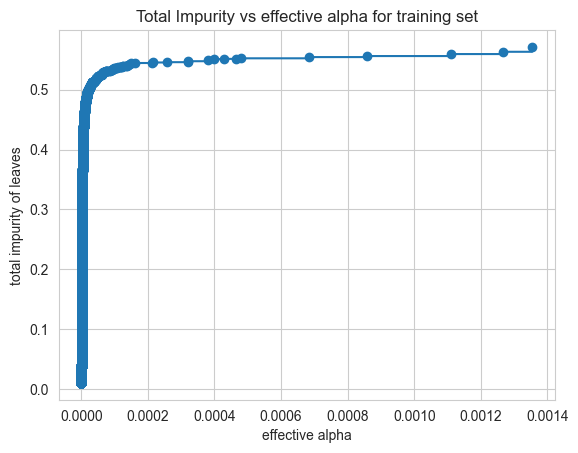

In [41]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier(max_features='sqrt', ccp_alpha=0.0001)
path = classifier.cost_complexity_pruning_path(trainX, trainY)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [44]:
classifier=tree.DecisionTreeClassifier(ccp_alpha=0.0001)
classifier.fit(trainX,trainY)
y_pred=classifier.predict(testX)

In [45]:
print("Accuracy = ",metrics.accuracy_score(testY,y_pred))
print("Classification Report")
print(metrics.classification_report(testY,y_pred))

Accuracy =  0.6006735280762827
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.56      0.58     52823
           1       0.60      0.73      0.66     63446
           2       0.62      0.22      0.33     15871

    accuracy                           0.60    132140
   macro avg       0.61      0.50      0.52    132140
weighted avg       0.60      0.60      0.59    132140



In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=10, max_features='sqrt')
classifier.fit(trainX,trainY)
y_pred=classifier.predict(testX)

In [48]:
print("Accuracy = ",metrics.accuracy_score(testY,y_pred))
print("Classification Report")
print(metrics.classification_report(testY,y_pred))

Accuracy =  0.5893824731345543
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.41      0.51     52823
           1       0.56      0.89      0.68     63446
           2       0.95      0.02      0.03     15871

    accuracy                           0.59    132140
   macro avg       0.73      0.44      0.41    132140
weighted avg       0.66      0.59      0.54    132140



In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_features='sqrt')
classifier.fit(trainX,trainY)
y_pred=classifier.predict(testX)

In [51]:
print("Accuracy = ",metrics.accuracy_score(testY,y_pred))
print("Classification Report")
print(metrics.classification_report(testY,y_pred))

Accuracy =  0.7502043287422431
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76     52823
           1       0.75      0.81      0.78     63446
           2       0.82      0.43      0.56     15871

    accuracy                           0.75    132140
   macro avg       0.77      0.67      0.70    132140
weighted avg       0.75      0.75      0.74    132140



In [55]:

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(10,))
classifier.fit(trainX,trainY)
y_pred=classifier.predict(testX)

In [56]:
print("Accuracy = ",metrics.accuracy_score(testY,y_pred))
print("Classification Report")
print(metrics.classification_report(testY,y_pred))

Accuracy =  0.6669517178749811
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.65      0.67     52823
           1       0.66      0.78      0.71     63446
           2       0.68      0.29      0.41     15871

    accuracy                           0.67    132140
   macro avg       0.67      0.57      0.60    132140
weighted avg       0.67      0.67      0.66    132140



In [53]:
print("Accuracy = ",metrics.accuracy_score(testY,y_pred))
print("Classification Report")
print(metrics.classification_report(testY,y_pred))

Accuracy =  0.6657635840774936
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.66      0.67     52823
           1       0.66      0.77      0.71     63446
           2       0.68      0.29      0.41     15871

    accuracy                           0.67    132140
   macro avg       0.67      0.57      0.59    132140
weighted avg       0.67      0.67      0.66    132140

